

# Projeto 3 - Ciência dos dados 

###### Nomes: Gustavo, Matheus, Pedro Carani e Thiago David






# Modelo preditivo do indíce Ibovespa.

# O que é o Ibovespa?

 O Ibovespa é o principal indicador de desempenho das ações negociadas na bolsa de valores B3, composto pelas empresas mais importantes do mercado de capitais brasileiros, é um ótimo paramêtro da economia nacional. Ele mostra como uma ação se comportaria caso fosse investida nessa bolsa de valores B3. O critério para as empresas que compõem essa bolsa B3 são aquelas cuja liquidez de negociações de ações foi a maior durante um certo período.



 A pergunta que nosso modelo tenta responder é: 


# É possível prever o indíce baseado no passado? 

Para responder essa pergunta, vamos fazer um modelo preditivo utilizando a técnica de Regressão Linear.

## Regressão Linear

 A regressão linear é um método de ajuste de reta dos dados que estão sendo considerados, e pode ser calculado de acordo com a seguinte fórmula: 

$$y_i=\beta_0+\beta_1x_i+\epsilon_i$$

Também, ajuda na procura por padrões e anomalias desses dados.  Primeiro, para fazer uma regressão linear, é necessário achar os coeficientes $\beta_0$ e $\beta_1$.

Para achar o $\beta_0$ nós usamos a seguinte fórmula:

$$\beta_0=\bar{y}-\beta_1\bar{x}$$

E para achar o $\beta_1$ usamos a seguinte fórmula: $$\beta_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

Após achar os coeficientes é necessário achar o vetor de resíduos através da fórmula: $\epsilon_i=y_i-(\beta_0+\beta_1x_i)$. Com os coeficientes e o vetor de resíduo já é possível a reta da regressão linear.
    

## Regressão Linear - Python

Para podermos usar a regressão linear no nosso projeto usamos as seguintes bibliotecas: 

### Importando bibliotecas: 

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import random
np.random.seed(1)

## Sobre o nosso Modelo:
   Os dados foram coletados do site https://finance.yahoo.com/:

     - Ibovespa (2018-2019)
     
     
     
     
   

## Qual variável explicativa vai ser utilizada?

 A variável explicativa a ser utilzada no modelo, será os valores do índice ibovespa 1 passo atras, já que o modelo preditivo é baseado no passado do índice. Ou seja, o nosso X, vai ser equivalente ao Y(n-1), onde Y é a pontuacao do Ibovespa.


## Nosso modelo:

## Lendo os arquivos de dados:

In [3]:
ibov=pd.read_csv("bov.csv")

# Análise exploratória dos dados:

## Dados do Ibovespa:

In [4]:
ibov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-08,87719.0,88570.0,85620.0,85620.0,85620.0,5297700
1,2018-11-09,85620.0,86233.0,84030.0,85641.0,85641.0,4814400
2,2018-11-12,85644.0,86227.0,85009.0,85525.0,85525.0,3534000
3,2018-11-13,85531.0,85941.0,84071.0,84914.0,84914.0,4410700
4,2018-11-14,84898.0,85973.0,84267.0,85973.0,85973.0,5591600


Como podemos obsvervar na leitura dos dados, há muitas informações que não serão utéis para a elaboração do nosso modelo, como por exemplo, o volume de negociação, ou a mínima e a máxima do índice no dia.

## Vamos analisar apenas os dados de fechamento

In [5]:
ibov["Close"].head()

0    85620.0
1    85641.0
2    85525.0
3    84914.0
4    85973.0
Name: Close, dtype: float64

## Criando um novo Dataset com apenas as informações necessárias (data e fechamento) para a análise:

In [6]:
ibov=pd.DataFrame(ibov, columns=['Date','Close'])


## Dataset do Ibovespa para o modelo:

In [7]:
ibov.head()

,Date,Close
0,2018-11-08,85620.0
1,2018-11-09,85641.0
2,2018-11-12,85525.0
3,2018-11-13,84914.0
4,2018-11-14,85973.0


## Separando os dados:

Vamos criar váriaveis dos dados necessários para a elaboração do nosso modelo, esse passo é importante pois facilita na organização do projeto.

In [8]:
date=ibov['Date']
pontos=ibov['Close']


## Gráfico do Ibovespa durante os anos de 2018 e 2019.

Vamos plotar um gráfico do índice Ibovespa para analisarmos a sua volatividade no período de 2018 a 2019

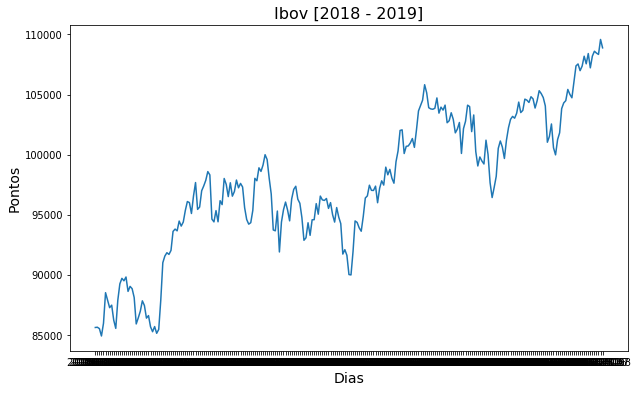

In [9]:
plt.figure(1, figsize=(10,6))
plt.plot(date, pontos)
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show();



Após a plotagem do gráfico, é possível observar que o indíce Ibovespa, mesmo com certa oscilações no périodo, possui uma tendência de alta. Isso pode ser explicado pelo desenvolvimento ecônomico do Brasil e também pelo aumento de investidores na bolsa de valores devido a dois fatores principais: diminuição da taxa de juros, e pela prosperidade do desenvolvimento do país graças ao avanço e encaminhamento de novas reformas econômicas e estruturais.

## Boxplot do índice Ibovespa


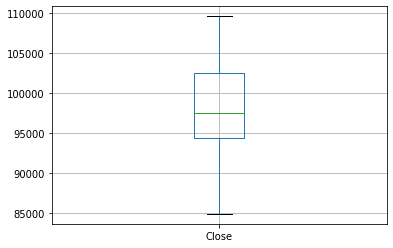

In [10]:
ibov.boxplot();


Nesse boxplot, é possível observar que, nesse período analisado, o indíce mantém a maioria dos seus valores entre 95.000 a 102.000 pontos, além disso, é possível observar a média do período, próximo a 97.000 pontos

## Histograma do Ibovespa

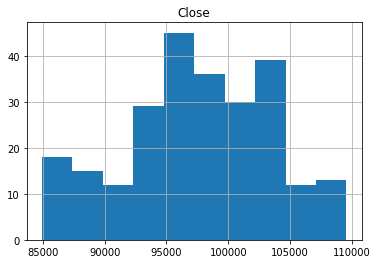

In [11]:
ibov.hist();

 Pelo histograma, é possivel analisar que as maiorias dos dados se encontram entre 95.000 pontos a 102.000 pontos.

## Pontos importantes:

Ao utilizar a função ".describe()", nós obtemos algumas informações interessantes para a ánalise exploratória como: a quantidade de dados, a média, o valor mínimo e máximo do valor total. 

In [12]:
ibov.describe()

,Close
count,249.000000
mean,97595.508879
std,5916.391315
min,84914.000000
25%,94389.000000
50%,97457.000000
75%,102551.000000
max,109581.000000


## Ponto mínimo  

Este é o ponto mínimo do índice Ibovespa.

In [13]:
ibov.min()

Date     2018-11-08
Close         84914
dtype: object

## Ponto máximo

Este é o ponto máximo do índice Ibovespa.

In [14]:
ibov.max()

Date     2019-11-08
Close        109581
dtype: object

## Média

Esse é a pontuação média do índice Ibovespa

In [15]:
ibov.mean()

Close    97595.508879
dtype: float64

## Modelo: 

## Primeiro, vamos fazer um modelo baseado apenas no índice anterior:

O Modelo basedo em passo atrás possui a seguinte estrutura:

$$\bar{Y}[n]=\beta_0 + \beta_1*Y[n-1]$$

$Variávelpreditiva: \bar{Y}[n]: Valor  preditivo  do  índice.$

$Variávelexplicativa: Y[n-1]: Valor  do  índice  a um  passo  atrás.$

### Criando um dataset com o Índice Ibov anterior:

Para a criação de um modelo de um passo atrás precisaremos de um dataset com o valor do fechamento anterior do índice. 

In [16]:
lista = np.array(pontos)
lista=lista[1:]
ibov_anterior=pd.DataFrame(lista)




ibov_novo=ibov.join(ibov_anterior, lsuffix='_caller', rsuffix='_other')
ibovespa=ibov_novo.rename(columns={"Close": "Fechamento anterior", 0: "Fechamento"})
ibovespa=ibovespa.dropna()
ibovespa.head()


,Date,Fechamento anterior,Fechamento
0,2018-11-08,85620.0,85641.0
1,2018-11-09,85641.0,85525.0
2,2018-11-12,85525.0,84914.0
3,2018-11-13,84914.0,85973.0
4,2018-11-14,85973.0,88515.0


In [17]:
anterior=ibovespa["Fechamento anterior"]
fechamento=ibovespa["Fechamento"]

ibovespa.corr()

,Fechamento anterior,Fechamento
Fechamento anterior,1.000000,0.981372
Fechamento,0.981372,1.000000


Como observado na matriz de correlacao acima, vemos que o retorno passado tem grande correlacao com o retorno presente.

### Separar dados para treinamento e teste

Para nosso modelo, será necessário separar os dados em dois: treinamento (80%) e teste (20%)

In [18]:
train, test = train_test_split(ibovespa, test_size=0.2, random_state = 1)

O argumento random_state = 1 é para que os dados permaneçam os mesmo, o que será importante para nosso projeto pois afetará nos valores dos B's.

### Treinamento

Vamos separar as variáveis em duas. Nos valores do X_train, teremos nossa variável explicativa (índice a um passo atrás). Já nos valores de Y_train, teremos nossa base para a variável preditiva.

In [19]:
X_train = np.array(train["Fechamento anterior"]).reshape(-1, 1)
y_train = train['Fechamento']

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

Utilizaremos das funções: model.intercept_ e model.coef_, para encontrarmos os valroes do B0 E B1 respectivamente.

In [21]:
print("B0=",model.intercept_)
print("B1=",model.coef_)

B0= 1109.8830689665774
B1= [0.98965823]


Podemos observar que o coeficiente B1 deu muito proximo da correlação de ambas pontuacoes, tal fato pode ser explicado devido a correlacao estar proxima de 1, sendo assim, a variacao de uma unidade no regressor, impactaria numa variacao igual na variavel preditiva, fazendo com que o coeficiente B1 da regressao capte o mesmo efeito.

#### Gráfico da Regressão Linear do modelo de um passo atrás com os dados de treinamento:

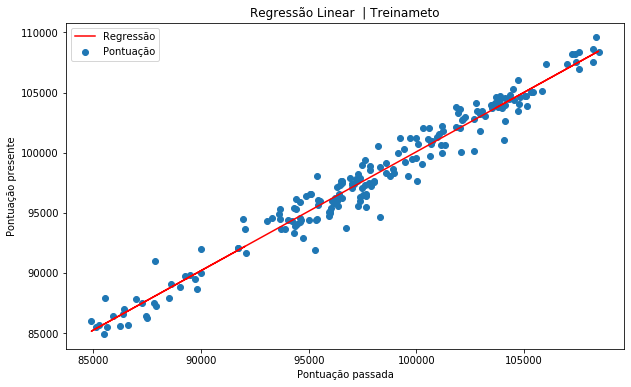

In [22]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train, y_train, label='Pontuação')
plt.plot(X_train, y_pred, color='r', label='Regressão')
plt.xlabel('Pontuação passada')
plt.ylabel('Pontuação presente')
plt.legend()
plt.show()

No gráfico acima, é possível observar a reta da regressão linear plotada.

### Teste

Para os dados de teste, a separação das variáveis será igual a base de treinemanto.

In [23]:
X_test = np.array(test["Fechamento anterior"]).reshape(-1, 1)
y_test = test['Fechamento']


Vamos utilizar os B's obtidos pelo modelo na base de treinamento para testarmos na nossa base de testes.

In [24]:
y_previsto=X_test*0.98965823+1109.8830689665774


Agora, vamos plotar a reta do modelo nos dados de teste.

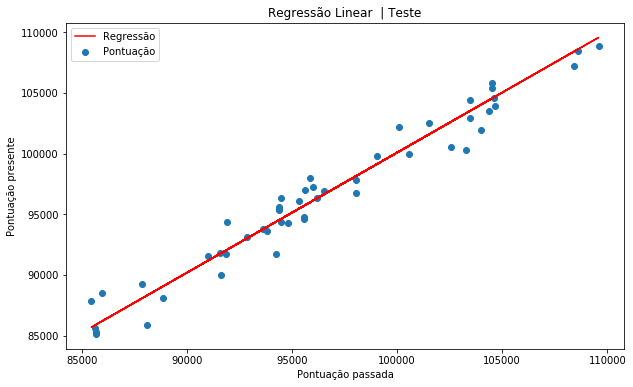

In [25]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Teste' )
plt.scatter(X_test, y_test, label='Pontuação')
plt.plot(X_test, y_previsto, color='r', label='Regressão')
plt.xlabel('Pontuação passada')
plt.ylabel('Pontuação presente')
plt.legend()
plt.show()

### R² (modelo com um passo atrás)

In [26]:
metrics.r2_score(y_train, y_pred)

0.9643690285658615

Como o R² se aproximou de 100%, aproximadamente 96%, isto é um indicativo de que a variável preditiva, é explicada pelo regressor x, no caso, o índice defasado a um passo atrás.

## Agora, vamos fazer um modelo baseado no índice defasado respectivamente, de um a quatro passos atrás:

Para esse modelo, a técnica utilizada é semelhante ao do modelo de um passo atrás. No entanto, agora, ao invés de pegarmos apenas o valor anterior do Ibovespa, utilizaremos também, os outros 3 anteriores, totalizando em 4 defasagens. A motivação para a criação desse modelo é obsevarmos se há alguma influência os índices desafasados.

$$\bar{Y}[n]=\beta_0 + \beta_1*Y[n-1] + \beta_2*Y[n-2] + \beta_3*Y[n-3] + \beta_4*Y[n-4]$$

Vamos pegar os 4 valores defasados do índice:

In [27]:
vals=fechamento.values
K = 5
n = len(vals)
x_dias = []
for k in range(K):
    x = vals[k:(n-K+k)]
    x_dias.append(x)

x_dias = np.array(x_dias).transpose()

ibov_anterior1=pd.DataFrame(x_dias)
X = x_dias[:, :-1]
y = x_dias[:, -1:]

Aqui é separado os dados de teste e os dados para treinamento, os dados dados foram separados na seguinte proporção: 20% para teste e 80% para treinamento


In [28]:
random.seed( 30 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

Abaixo, são os B's do modelos:

In [30]:
print("B0=",model.intercept_)
print("B's=",model.coef_)


B0= [2583.24420774]
B's= [[ 0.00249712  0.07289824 -0.10062166  0.99975053]]


Podemos observar nesse modelo, que o índice defasado a dois passos atrás, impacta negativamente no índice presente. Assim como, o índice defasado a um, três e quatro passos atrás, demonstram estar relacionados positivamente com o índice presente. Outro fato a ser analisado é que devido ao B1 próximo a 1, e aos outros B's são relativamente baixos, podemos dizer que o índice futuro é basicamente influenciado pelo índice defasado a um passo atrás. 

#### Gráfico da Regressão Linear do modelo de um a quatro passos atrás com os dados de treinamento:

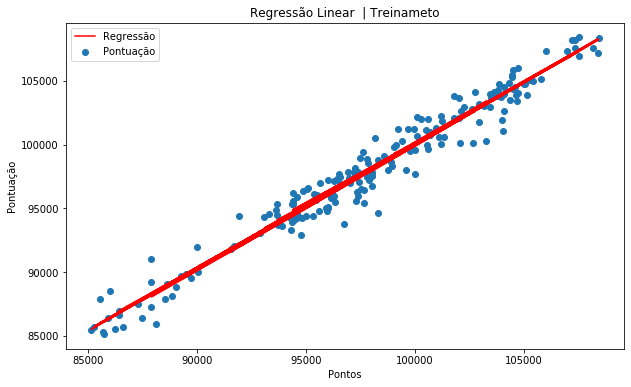

In [31]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train[:,3], y_train, label='Pontuação')
plt.plot(X_train[:,3], y_pred, color='r', label='Regressão')
plt.xlabel('Pontos')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

Agora, vamos analisar o modelo nos dados de teste.

In [32]:
y_previsao=[]
i=0
while i < len(X_test):
    y_previsao.append(2583.24420774+X_test[i][0]*0.00249712+X_test[i][1]*0.07289824+X_test[i][2]*-0.10062166+X_test[i][3]*0.99975053)
    i+=1
      


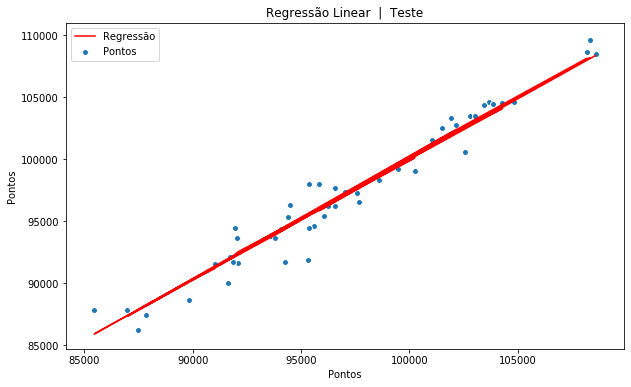

In [33]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  |  Teste')
plt.plot(X_test[:,3], y_previsao , color='r', label='Regressão')
plt.scatter(X_test[:,3], y_test, edgecolor='w', label='Pontos')
plt.xlabel('Pontos')
plt.ylabel('Pontos')
plt.legend()

plt.show()

## R² (modelo de 1 a 4  passos atrás):

In [34]:
metrics.r2_score(y_train, y_pred)

0.9614722863714179

Como o R² se aproximou de 100%, aproximadamente 96%, isto é um indicativo de que a variável preditiva, é explicada pelo regressor x, no caso, o índice defasado de um a quatro passo atrás.

# Análise dos resíduos 

A Análise de Resíduos consiste em um conjunto de técnicas para investigar a adequabilidade do modelo com base nos resíduos.



In [35]:
e=y_previsto[1:]-y_test

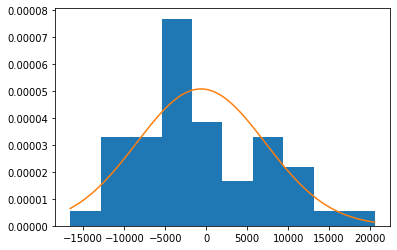

In [36]:
from scipy.stats import norm

mu, std = norm.fit(e)
        
x = np.linspace(min(e), max(e), 100)
p = norm.pdf(x, mu, std)
plt.hist(e, density=True)

plt.plot(x, p)
plt.show()




Como podemos observar os resíduos não seguem muito bem uma distribuição normal, isso pode ser explicado pela aleatoriedade do índice.

In [49]:
e=(y_previsto[1:]-y_test)**2
eb=e.mean()
eb=eb**(1/2)
eb

7873.398227092315

Para evitar que os erros positivos se anulem com os erros negativos, elevamos a diferença do previsto e do real ao quadrado, para assim deixar todos os erros positivos e então tirar a média e posteriormente sua raiz para ter uma melhor medida de qualidade do modelo.  

# Conclusão:

### Equação do nosso modelo:

$Yn=\beta_0+\beta_1Y(n-1)+\beta_2Y(n-2)+\beta_3Y(n-3)+\beta_4Y(n-4)$ + $\epsilon_i$

In [39]:
y=fechamento
y=np.array(y)
pred=[]

len(y)

248

In [40]:
n=0
while n < len(y)+1:
    if n>5:
        pred.append(1799.20843632+0.00249712*y[n-1]+0.07289824*y[n-2]-0.15793943*y[n-3]+0.99975053*y[n-4]+eb)
    n+=1


len(pred)


243

### Plotando o gráfico do Ibovespa real + valor predito pelo nosso modelo:

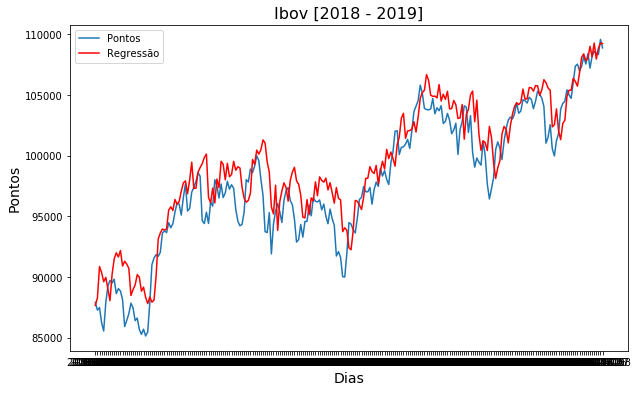

In [41]:
plt.figure(1, figsize=(10,6))
plt.plot(date[6:], pontos[6:], label="Pontos")
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.plot(date[6:], pred, color='r', label='Regressão')
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.legend()
plt.show();

### Análise de resíduos periódicos

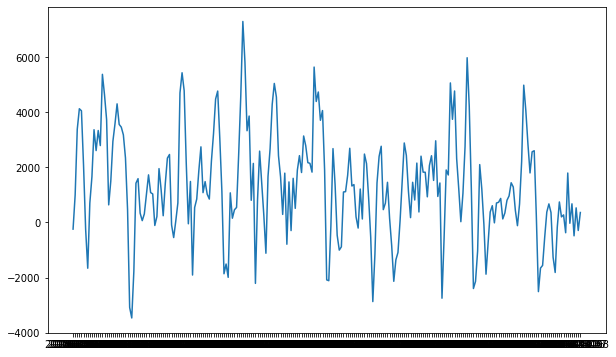

In [42]:
plt.figure(1, figsize=(10,6))
residuos=pred-pontos[6:]
plt.plot(date[6:], residuos)
plt.show();

Analisando o gráfico de resíduos temporal é possível observar uma periodicidade. Isso pode ser explicado pela movimentação da bolsa de valores em dias de semana, pois normalmente no meio da semana o mercado é mais movimentado, já no começo (segunda) e no final (sexta) o mercado tem menos volatilidade.

### Criando um novo dataset com as seguintes informações: pontos reais do Ibovespa e os pontos previstos pelo nosso modelo.

In [43]:
colunas=['Pontos', 'Pred']
df = pd.DataFrame(columns=colunas)
df["Pontos"]=pontos[6:]
df['Pred']=pred
df.head()

,Pontos,Pred
6,87901.0,87658.983611
7,87269.0,88269.899692
8,87477.0,90862.688063
9,86230.0,90360.707882
10,85547.0,89603.404508


### Correlação dos dados:

In [44]:
df.corr()

,Pontos,Pred
Pontos,1.000000,0.942319
Pred,0.942319,1.000000


### Comparando com o modelo preditivo simples:

O modelo preditivo simples é basicamente prever a pontuação futura com a mesma pontuação anterior, ou seja, se no dia 14/01 o ibovespa atingia 100.000 pontos, por esse modelo simples, a pontuação do ibovespa no dia 15/01 será de 100.000 pontos.

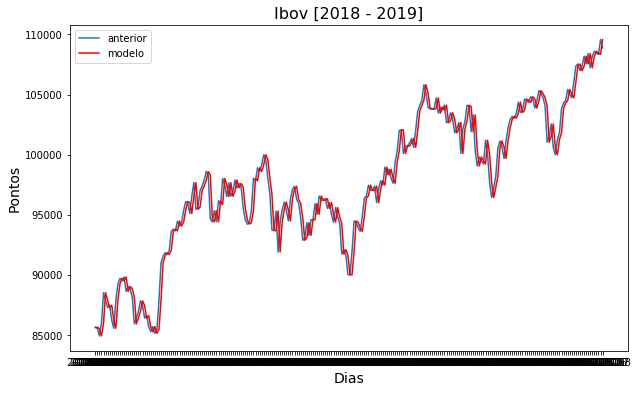

In [45]:
plt.figure(1, figsize=(10,6))
plt.plot(date[1:], fechamento, label="anterior")
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.plot(date[1:], anterior, color='r', label='modelo')
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.legend()
plt.show();

## Conclusão Formal.


 Como o mercado de ações é de certa maneira imprevisível, dificilmente o modelo funcionará perfeitamente, pois não é possível saber como o mercado reagirá numa possível catástrofe ecônomica, nem em momentos de euforia. No entanto, ao analisar o passado do índice, é possível concluir que ao fazer uma auto-regressão, o modelo se mostra até que bem.
 Porém, ao compará-lo com o modelo preditivo simples, podemos perceber uma maior acurácia, sendo assim, podemos concluir, que é sim possível prever o índice baseado no passado, e que é mais provável que ele mantenha o índice anterior do que ocorra alguma oscilação, no entanto, como o próprio nome diz, é um mercado variável e de riscos.
 

Quando consultado a literatura de artigos financeiros, identificamos que os mesmos seguem passeio aleatorio, logo, não podem ser previstos.



Quando analisado o modelo de regressao de linear utilizado pelo modelo, esse se aproxima muito de um processo autoregressivo, o primeiro de ordem 1 e o segundo de ordem 4.

## Teste com o valor atual (19/11) 

Para simular o modelo preditivo, vamos analisar os quatro passos do índice ibovespa do dia 19/11.
Colocamos os dados na lista "dados_atuais", e aplicamos a fórmula de regressão do nosso modelo de ordem 4. 

In [46]:
dados_atuais=[106.269, 106.556, 106.059, 106.751]
y=dados_atuais
teste_atual=1799.20843632+0.00249712*y[0]+0.07289824*y[1]-0.15793943*y[2]+0.99975053*y[3]+eb
teste_atual

9770.613245540695

O valor previsto para o fechamento no dia 19/11, de acordo com o nosso modelo será: 9770.61 pontos.

## Proposta de melhora no modelo: 


Uma possível melhora no modelo é a obtenção de mais dados para uma análise mais robusta. Outra melhora com significância é na analíse dos resíduos, encontrar uma distribuição que se encaixe mais adequadamente. No entanto, mesmo com essas melhoras, o modelo nao funcionará perfeitamente, pois o mercado é imprevisível.

## Referências:

    - Montgomery. Cap 11, pág 333.
    -https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score
    -https://scikit-learn.org/stable/modules/model_evaluation.html
    -http://www.b3.com.br/pt_br/
    -https://finance.yahoo.com/